# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

1. Подберите скорость обучения (alpha) и количество итераций для градиентного спуска.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

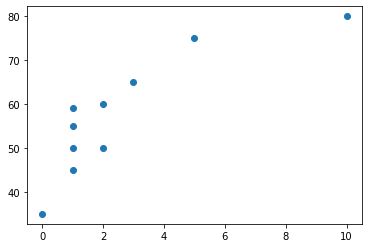

In [4]:
plt.scatter(X[1,:], y)

In [5]:
def gradient_descent(alpha, iteration):
    
    n = X.shape[1]
    W = np.array([1, 0.5])
    
    errors = []
    
    for i in range(iteration):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot(X ,(y_pred - y))))
        if i % 100 == 0:
            print(i, W, err)
                
            

In [6]:
alpha=1e-4 
iteration=1000

gradient_descent(alpha=alpha, iteration=iteration)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796258
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889413
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


In [7]:
alpha=1e-3 
iteration=1000

gradient_descent(alpha=alpha, iteration=iteration)

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297


In [8]:
alpha=1e-2 #0.01
iteration=1000

gradient_descent(alpha=alpha, iteration=iteration)
#Лучший результат

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434


2 (опция). В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [9]:
W = np.array([1, 0.5])
n = X.shape[1]

In [10]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y)))) #в этой строчке ошибка - надо суммировать только строки и не суммировать столбцы, а потом сложить их с W
    if i % 100 == 0:
        print(i, W, err)

0 [5.502 5.002] 3173.15
100 [11.82211538 11.32211538] 737.0918269230771
200 [11.82211538 11.32211538] 737.0918269230771
300 [11.82211538 11.32211538] 737.0918269230771
400 [11.82211538 11.32211538] 737.0918269230771
500 [11.82211538 11.32211538] 737.0918269230771
600 [11.82211538 11.32211538] 737.0918269230771
700 [11.82211538 11.32211538] 737.0918269230771
800 [11.82211538 11.32211538] 737.0918269230771
900 [11.82211538 11.32211538] 737.0918269230771


In [11]:
#Решение
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

    W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y)))) 
    ''' или еще так можно записать - 2 варианта
    W -= (alpha * (1 / n * 2 * (X @ (y_pred - y))))
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))) # здесь обозначаем ось, которую будем суммировать''' 
    if i % 100 == 0:
        print(i, W, err)

0 [12.14492308 10.99930769] 737.0918269230771
100 [34.85674799  6.19592562] 130.01315707213521
200 [42.88079124  4.71422465] 56.33192565977271
300 [45.70215039  4.1932391 ] 47.22258165810515
400 [46.69417738  4.01005373] 46.09637697137415
500 [47.04298712  3.94564334] 45.95714224753643
600 [47.16563321  3.9229958 ] 45.939928406615174
700 [47.20875719  3.91503263] 45.937800228305235
800 [47.22392015  3.91223267] 45.937537117768805
900 [47.22925164  3.91124817] 45.93750458893693
